In [1]:
!git clone https://github.com/arantafall/housing_BCN.git

Cloning into 'housing_BCN'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 19 (delta 4), reused 16 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 119.49 KiB | 873.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
cd housing_BCN

/content/housing_BCN


In [3]:
cat dataframe.ipynb

cat: dataframe.ipynb: No such file or directory


In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("data/Barcelona_Fotocasa_HousingPrices.csv")

In [6]:
!git config --global user.name Arantafall
!git config --global user.email aran.tafall.campusimpelia@gmail.com

In [7]:
data.shape

(8188, 10)

In [8]:
data.head()

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636


In [9]:
!git checkout -b aran

Switched to a new branch 'aran'


In [10]:
!git branch

* aran
  main


In [11]:
data.isnull().sum()
(data.isnull().sum() / len(data)) * 100

,0
Unnamed: 0,0.000000
price,0.000000
rooms,0.000000
bathroom,0.000000
lift,0.000000
terrace,0.000000
square_meters,0.000000
real_state,3.273083
neighborhood,0.000000
square_meters_price,0.000000


In [12]:
data.describe().round(2)

,Unnamed: 0,price,rooms,bathroom,square_meters,square_meters_price
count,8188.00,8188.00,8188.00,8188.00,8188.00,8188.00
mean,4093.50,1444.09,2.42,1.51,84.61,17.74
std,2363.82,1125.89,1.14,0.73,47.87,9.25
min,0.00,320.00,0.00,1.00,10.00,4.91
25%,2046.75,875.00,2.00,1.00,56.00,12.79
50%,4093.50,1100.00,2.00,1.00,73.00,15.31
75%,6140.25,1540.00,3.00,2.00,95.00,19.44
max,8187.00,15000.00,10.00,8.00,679.00,186.67


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


In [14]:
data.rename(columns={'real_state': 'property_type'}, inplace=True)

In [15]:
data['property_type'].unique()

array(['flat', 'attic', nan, 'apartment', 'study'], dtype=object)

In [16]:
data

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,property_type,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636
...,...,...,...,...,...,...,...,...,...,...
8183,8183,1075,2,2,False,False,65,flat,Gràcia,16.538462
8184,8184,1500,3,2,True,False,110,flat,Eixample,13.636364
8185,8185,1500,2,2,True,True,90,flat,Sarria-Sant Gervasi,16.666667
8186,8186,1500,3,2,True,False,110,flat,Eixample,13.636364


In [17]:
print(data['property_type'].unique())
print(data['property_type'].dtype)

['flat' 'attic' nan 'apartment' 'study']
object


In [18]:
data['property_type'].value_counts()

,count
property_type,
flat,6505
apartment,991
attic,315
study,109


In [19]:
data = data.dropna(subset=['property_type'])
data.reset_index(drop=True, inplace=True)

# Analisis de los datos

In [40]:
# Con .describe() conocemos diversos datos de interés como la mediana, la desviación típica y los percentiles de las variables numéricas
data[['price', 'rooms', 'bathroom', 'square_meters', 'square_meters_price']].describe().round(2)

,price,rooms,bathroom,square_meters,square_meters_price
count,7920.00,7920.00,7920.00,7920.00,7920.00
mean,1434.89,2.44,1.50,84.54,17.63
std,1119.53,1.13,0.73,47.58,9.02
min,320.00,0.00,1.00,10.00,5.56
25%,875.00,2.00,1.00,56.00,12.78
50%,1100.00,2.00,1.00,73.00,15.22
75%,1500.00,3.00,2.00,95.00,19.30
max,15000.00,10.00,8.00,679.00,185.00


<Axes: >

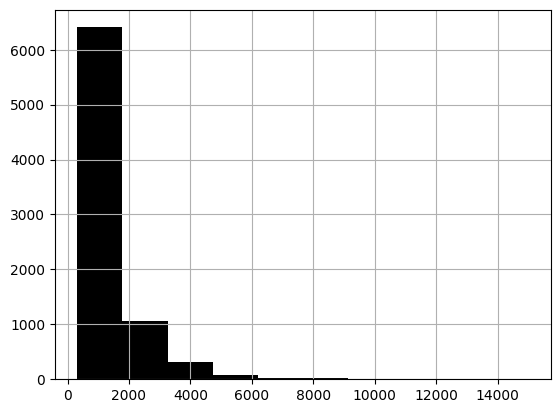

In [41]:
# Vamos a crear histogramas para visualizar mejor estos datos en cada una de las columnas
data['price'].hist(color='black')

En el grafico de arriba podemos observar que abundan las viviendas entre 0€ y 1800€, que hay unas pocas mas de 1000 entre 1800-3000€ y a partir de ahí disminuye muchísimo la cantidad de viviendas


<Axes: >

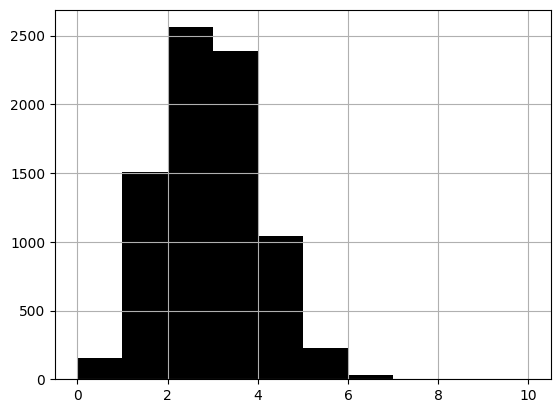

In [43]:
data['rooms'].hist(color='black')

En el gráfico de arriba podemos observar que la mayoría de viviendas tiene 2 o 3 habitaciones, veámoslo en porcentajes:

In [45]:
print(f"{(data['rooms'].value_counts(normalize=True) * 100).round(2)}")

rooms
2     32.34
3     30.19
1     19.07
4     13.12
5      2.89
0      1.92
6      0.35
7      0.06
10     0.04
9      0.03
Name: proportion, dtype: float64


<Axes: >

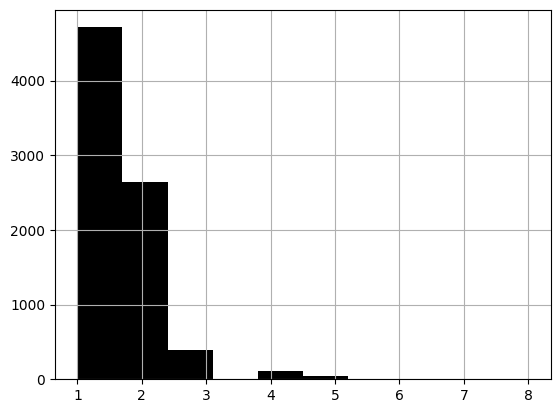

In [46]:
data['bathroom'].hist(color='black')

En el gráfico de arriba podemos observar que la gran mayoría de viviendas tiene 1 solo baño, veámoslo en porcentajes:

In [47]:
print(f"{(data['bathroom'].value_counts(normalize=True) * 100).round(2)}")

bathroom
1    59.53
2    33.41
3     4.95
4     1.46
5     0.52
6     0.09
8     0.03
7     0.01
Name: proportion, dtype: float64


<Axes: >

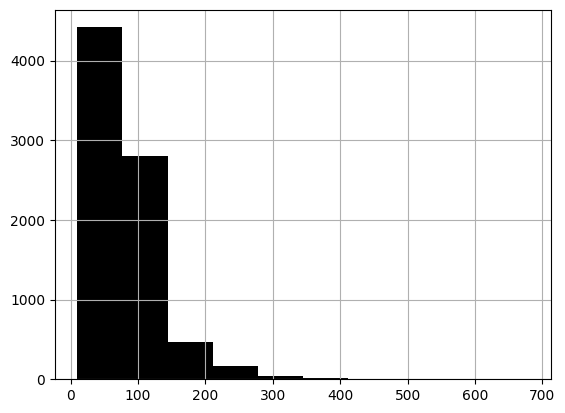

In [48]:
data['square_meters'].hist(color='black')

<Axes: >

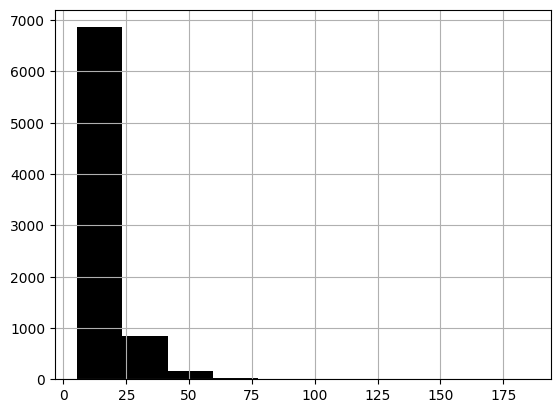

In [49]:
data['square_meters_price'].hist(color='black')

# Variables categóricas
Para las variables categóricas, nos viene bien contar cuantos valores hay en cada variable

In [51]:
data[''].value_counts()

,count
neighborhood,
Eixample,2360
Sarria-Sant Gervasi,1320
Ciutat Vella,1314
Gràcia,658
Sant Martí,592
Sants-Montjuïc,572
Les Corts,512
Horta- Guinardo,305
Sant Andreu,174


In [53]:
data['property_type'].value_counts()

,count
property_type,
flat,6505
apartment,991
attic,315
study,109


<Axes: title={'center': 'Tipo de vivienda'}, xlabel='property_type'>

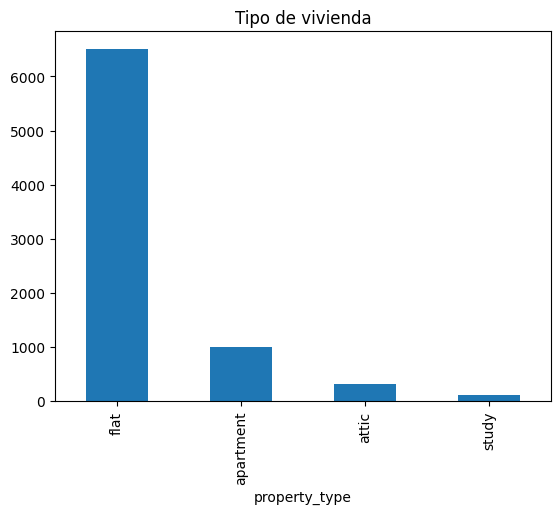

In [55]:
data['property_type'].value_counts().plot(kind='bar', title='Tipo de vivienda')

<Axes: title={'center': 'Barrio'}, xlabel='neighborhood'>

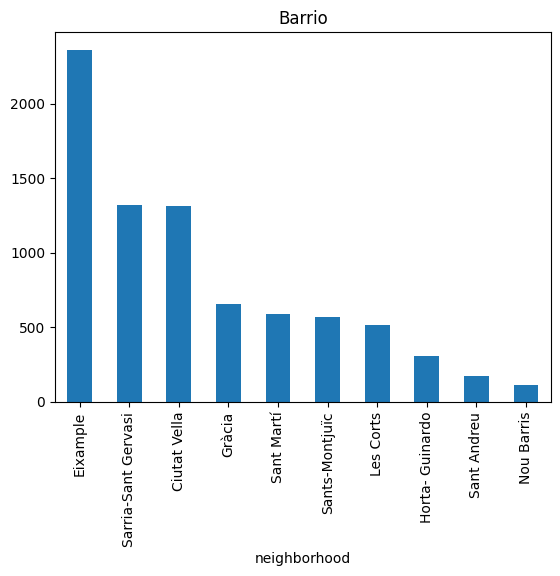

In [56]:
data['neighborhood'].value_counts().plot(kind='bar', title='Barrio')

# Porcentajes
Veamos en porcentajes la cantidad de viviendas por tipo y por barrio

In [58]:
print(f"{(data['property_type'].value_counts(normalize=True) * 100).round(2)}")

property_type
flat         82.13
apartment    12.51
attic         3.98
study         1.38
Name: proportion, dtype: float64


In [59]:
print(f"{(data['neighborhood'].value_counts(normalize=True) * 100).round(2)}")

neighborhood
Eixample               29.80
Sarria-Sant Gervasi    16.67
Ciutat Vella           16.59
Gràcia                  8.31
Sant Martí              7.47
Sants-Montjuïc          7.22
Les Corts               6.46
Horta- Guinardo         3.85
Sant Andreu             2.20
Nou Barris              1.43
Name: proportion, dtype: float64


# Variables Booleanas
Veamos cuantas viviendas tienen ascensor y cuantas viviendas tienen terraza

In [60]:
data.lift.value_counts()

,count
lift,
True,5510
False,2410


In [62]:
print(f"{(data['lift'].value_counts(normalize=True) * 100).round(2)}")

lift
True     69.57
False    30.43
Name: proportion, dtype: float64


<Axes: title={'center': 'Ascensor'}, xlabel='lift'>

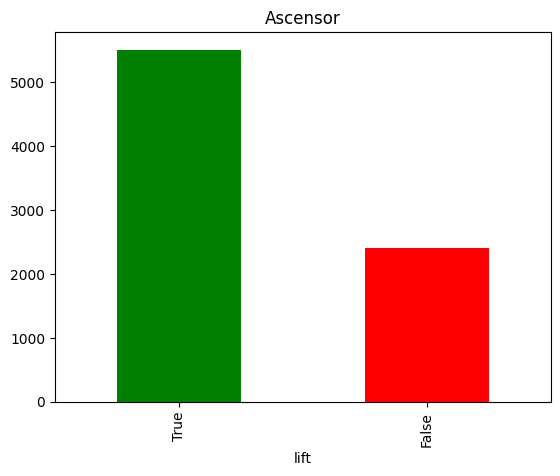

In [64]:
data['lift'].value_counts().plot(kind='bar', color=['green', 'red'], title='Ascensor')

In [61]:
data.terrace.value_counts()


,count
terrace,
False,6294
True,1626


In [63]:
print(f"{(data['terrace'].value_counts(normalize=True) * 100).round(2)}")

terrace
False    79.47
True     20.53
Name: proportion, dtype: float64


<Axes: title={'center': 'Terraza'}, xlabel='terrace'>

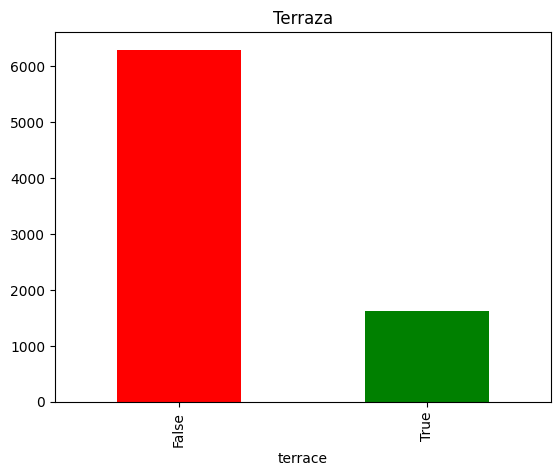

In [65]:
data['terrace'].value_counts().plot(kind='bar', color=['red', 'green'], title='Terraza')

# precios

In [29]:
data['price'].describe()
# mediana de los precios en barcelona

,price
count,7920.000000
mean,1434.894949
std,1119.528321
min,320.000000
25%,875.000000
50%,1100.000000
75%,1500.000000
max,15000.000000


In [30]:
mediana_precios_zona = data.groupby('neighborhood')['price'].median()
mediana_precios_zona
#mediana de los precios por barrio

,price
neighborhood,
Ciutat Vella,995.0
Eixample,1225.0
Gràcia,977.5
Horta- Guinardo,825.0
Les Corts,1213.5
Nou Barris,780.0
Sant Andreu,850.0
Sant Martí,1000.0
Sants-Montjuïc,900.0


# metros quadrados

In [31]:
data['square_meters'].describe().round(2)
#mediana del tamaño de los pisos en barcelona

,square_meters
count,7920.00
mean,84.54
std,47.58
min,10.00
25%,56.00
50%,73.00
75%,95.00
max,679.00


In [32]:
mediana_metros_zona = data.groupby('neighborhood')['square_meters'].median().sort_values(ascending=False)
mediana_metros_zona
# muestra la mediana del tamaño de los pisos por barrio ordenado de mas grande a mas pequeño

,square_meters
neighborhood,
Les Corts,85.0
Sarria-Sant Gervasi,85.0
Eixample,80.0
Sant Martí,71.0
Gràcia,70.0
Sant Andreu,70.0
Horta- Guinardo,65.0
Sants-Montjuïc,65.0
Nou Barris,63.0


In [33]:
mediana_precio_tipo = data.groupby('property_type')['price'].median().sort_values(ascending=False)
mediana_precio_tipo
#precio promedio por tipo de propiedad

,price
property_type,
apartment,1700.0
attic,1300.0
flat,1050.0
study,690.0


In [36]:
frecuencia = pd.crosstab(data['neighborhood'], data['property_type'])
frecuencia
#cantidad de tipos de vivienda por barrio

property_type,apartment,attic,flat,study
neighborhood,,,,
Ciutat Vella,277,33,972,32
Eixample,380,80,1885,15
Gràcia,51,33,561,13
Horta- Guinardo,14,25,254,12
Les Corts,44,20,444,4
Nou Barris,1,6,106,0
Sant Andreu,6,7,159,2
Sant Martí,53,19,512,8
Sants-Montjuïc,49,20,495,8
